In [5]:
import pandas as pd  # Para manipulación de datos
import matplotlib.pyplot as plt  # Para visualización de gráficos
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold  # Para dividir datos y optimización de hiperparámetros
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Algoritmo de clasificación y visualización
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métricas de evaluación del modelo

In [6]:
# Cargar el conjunto de datos
datos = pd.read_csv("C:/Users/david/segundaEvaluacion/Conjunto de Datos/diabetes_indiana.csv")

# Mostrar las primeras filas del conjunto de datos
print(datos.head())

   Unnamed: 0  0    1   2   3    4     5      6   7  8
0           0  6  148  72  35    0  33.6  0.627  50  1
1           1  1   85  66  29    0  26.6  0.351  31  0
2           2  8  183  64   0    0  23.3  0.672  32  1
3           3  1   89  66  23   94  28.1  0.167  21  0
4           4  0  137  40  35  168  43.1  2.288  33  1


In [7]:
# Convertir los datos a un arreglo de NumPy y separar características y etiquetas
data = datos.values
X, y = data[:, 1:-1], data[:, -1]

# Mostrar dimensiones de los datos
print(f"Características (X): {X.shape}, Etiquetas (y): {y.shape}")

Características (X): (768, 8), Etiquetas (y): (768,)


In [8]:
# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Definir el modelo de Árbol de Decisión
modelo = DecisionTreeClassifier()

# Entrenar el modelo con el conjunto de entrenamiento
modelo.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
# Hacer predicciones en el conjunto de prueba
predicciones = modelo.predict(X_test)

# Calcular la precisión del modelo
precision_inicial = accuracy_score(y_test, predicciones)
print(f"Precisión inicial: {precision_inicial}")

# Mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, predicciones)
print("Matriz de confusión:\n", matriz_confusion)

Precisión inicial: 0.7467532467532467
Matriz de confusión:
 [[76 23]
 [16 39]]


In [14]:
# Configuración de la validación cruzada repetida
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Definir el espacio de búsqueda de hiperparámetros
espacio = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_leaf': [3, 5, 10, 15, 20],
    'min_samples_split': [8, 10, 12, 16, 20]
}

# Implementación de GridSearchCV para encontrar los mejores hiperparámetros
search = GridSearchCV(modelo, espacio, scoring='accuracy', n_jobs=-1, cv=cv)
resultado = search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros y la mejor puntuación obtenida
print(f"Mejor puntuación: {resultado.best_score_}")
print(f"Mejores hiperparámetros: {resultado.best_params_}")

Mejor puntuación: 0.7677331218050413
Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [15]:
# Reentrenar el modelo con los mejores hiperparámetros
modelo_opt = DecisionTreeClassifier(**resultado.best_params_)
modelo_opt.fit(X_train, y_train)

# Hacer predicciones optimizadas en el conjunto de prueba
predicciones_opt = modelo_opt.predict(X_test)

# Calcular la precisión del modelo optimizado
precision_opt = accuracy_score(y_test, predicciones_opt)
print(f"Precisión optimizada: {precision_opt}")

# Mostrar la matriz de confusión optimizada
matriz_confusion_opt = confusion_matrix(y_test, predicciones_opt)
print("Matriz de confusión optimizada:\n", matriz_confusion_opt)

# Mostrar reporte de clasificación detallado
reporte_clasificacion = classification_report(y_test, predicciones_opt)
print("Reporte de clasificación:\n", reporte_clasificacion)

Precisión optimizada: 0.7597402597402597
Matriz de confusión optimizada:
 [[76 23]
 [14 41]]
Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.84      0.77      0.80        99
         1.0       0.64      0.75      0.69        55

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.77      0.76      0.76       154



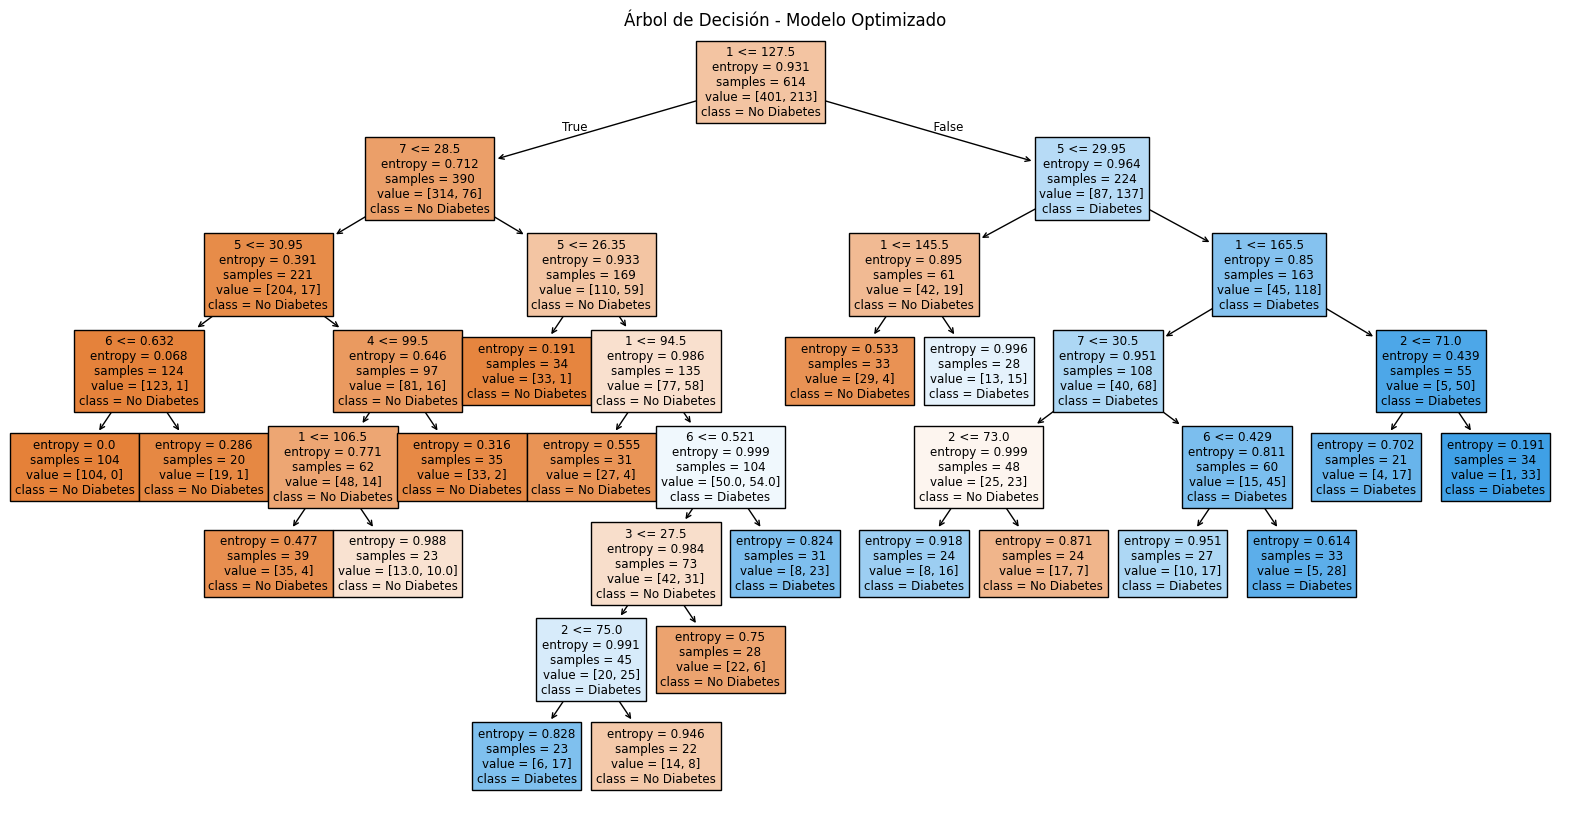

In [17]:
# Visualizar el árbol de decisión optimizado
plt.figure(figsize=(20, 10))
plot_tree(modelo_opt, filled=True, feature_names=datos.columns[1:-1], class_names=['No Diabetes', 'Diabetes'])
plt.title("Árbol de Decisión - Modelo Optimizado")
plt.show()